In [1]:
import random
import os
import h5py
import numpy as np
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../../../../../dataset/videos.json',
    labels_path='../../../../../dataset/labels.txt'
)
videos = dataset.get_subset_videos('validation')
videos = random.sample(videos, 8)

In [2]:
experiment = 9
nb_epoch = 150

predictions_file = '../predictions/predictions_{experiment:02d}_e{nb_epoch:03d}.hdf5'.format(
    experiment=experiment, nb_epoch=nb_epoch)
weights_path = '../model_snapshot/lstm_activity_classification_{experiment:02d}_e{nb_epoch:03d}.hdf5'
predictions_dataset = h5py.File(predictions_file, 'r')['validation']

predictions = []
for v in videos:
    prediction = predictions_dataset[v.video_id][...]
    class_prediction = np.argmax(prediction, axis=1)
    predictions.append((v, prediction, class_prediction))

Video ID: HNvolNt5RU0		Ground truth: Playing water polo
0.8118	Swimming
0.1180	Springboard diving
0.0293	Plataform diving


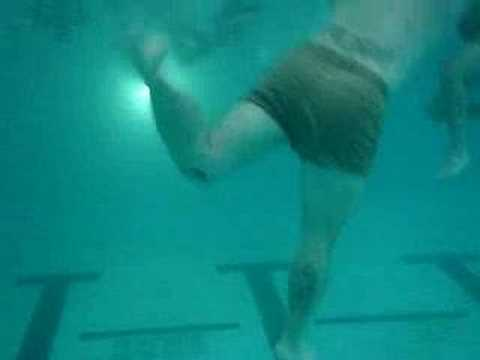



Video ID: fKy5rh-SoTM		Ground truth: Playing pool
0.9520	Playing pool
0.0136	Ping-pong
0.0115	Playing blackjack


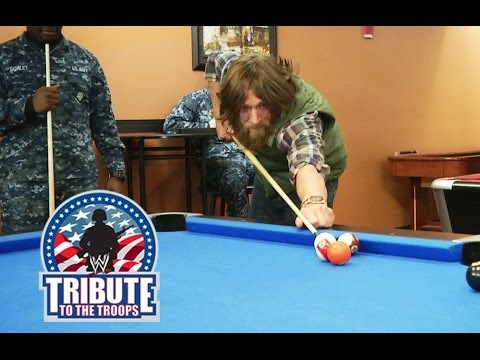



Video ID: sY31L_r7dsk		Ground truth: Preparing salad
0.1887	Preparing salad
0.1139	Making a lemonade
0.0665	Playing drums


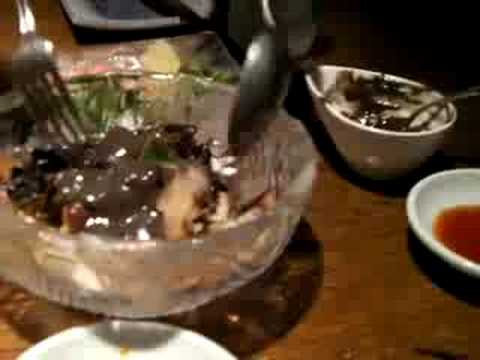



Video ID: Tw1vg9qWLx0		Ground truth: Croquet
0.8571	Croquet
0.0275	Trimming branches or hedges
0.0165	Slacklining


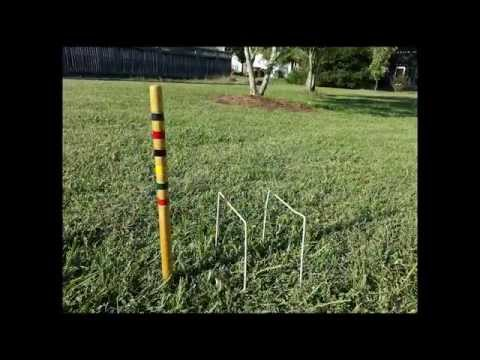



Video ID: HzSCfBOefA4		Ground truth: Washing dishes
0.1890	Washing dishes
0.1000	Making a lemonade
0.0814	Smoking hookah


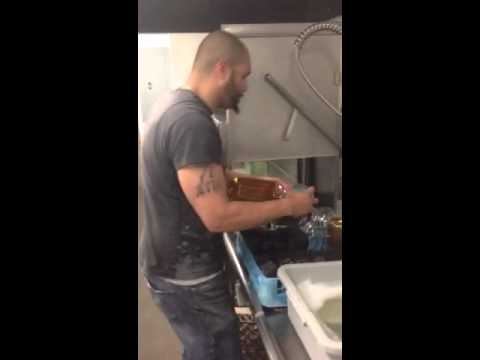



Video ID: 5F4jcV8dHVs		Ground truth: Wakeboarding
0.9441	Wakeboarding
0.0493	Waterskiing
0.0019	Sailing


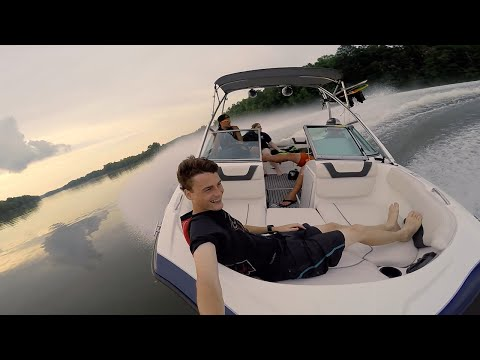



Video ID: J76bFZWXHFY		Ground truth: Rock climbing
0.9677	Rock climbing
0.0065	Trimming branches or hedges
0.0033	Roof shingle removal


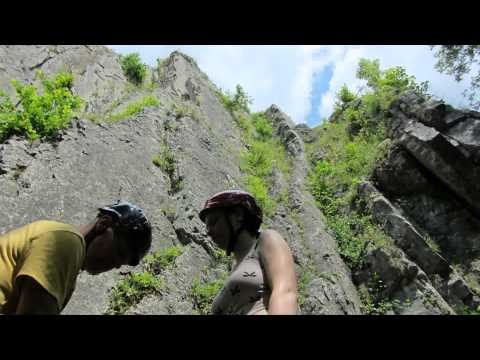



Video ID: hW6aZXhKl9M		Ground truth: Horseback riding
0.2939	Kayaking
0.2811	Horseback riding
0.1069	Scuba diving


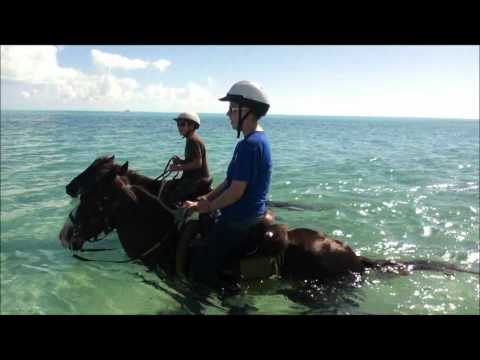

In [3]:
from IPython.display import YouTubeVideo, display

for v, prediction, class_prediction in predictions:
    print('Video ID: {}\t\tGround truth: {}'.format(v.video_id, v.get_activity()))
    class_means = np.mean(prediction, axis=0)
    top_3 = np.argsort(class_means[1:])[::-1][:3] + 1
    scores = class_means[top_3]/np.sum(class_means[1:])
    for index, score in zip(top_3, scores):
        if score == 0.:
            continue
        label = dataset.labels[index][1]
        print('{:.4f}\t{}'.format(score, label))
    vid = YouTubeVideo(v.video_id)
    display(vid)
    print('\n')

Video ID: HNvolNt5RU0
Main Activity: Playing water polo


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


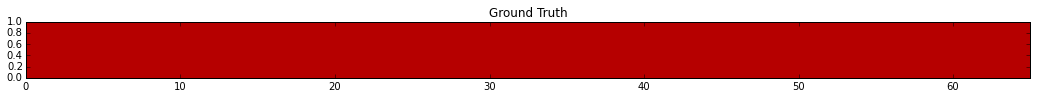

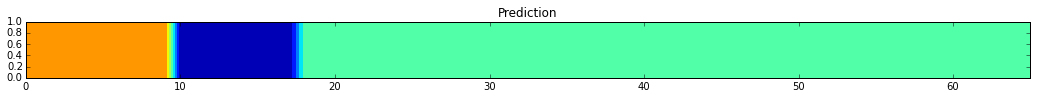

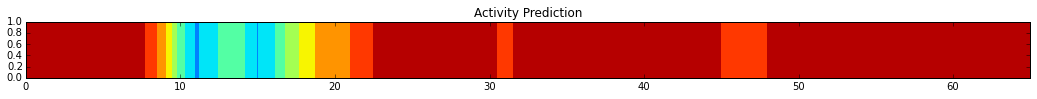



Video ID: fKy5rh-SoTM
Main Activity: Playing pool


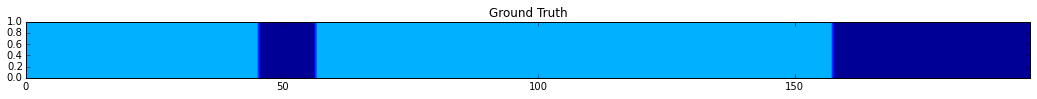

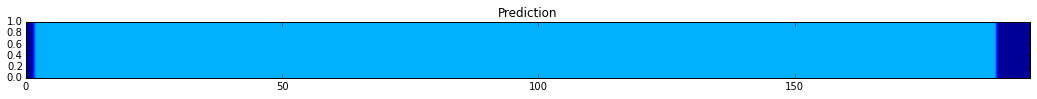

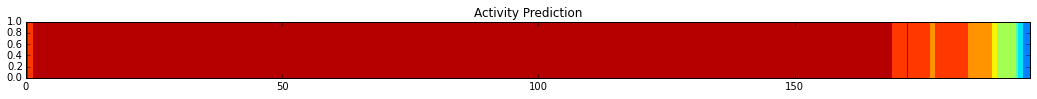



Video ID: sY31L_r7dsk
Main Activity: Preparing salad


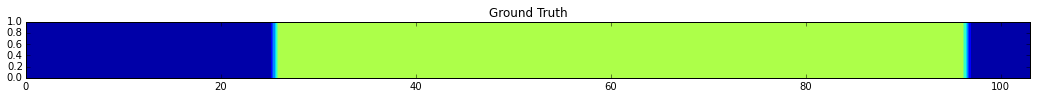

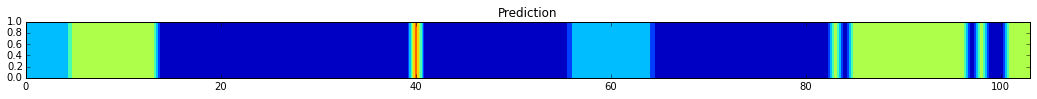

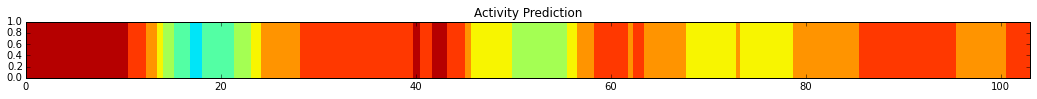



Video ID: Tw1vg9qWLx0
Main Activity: Croquet


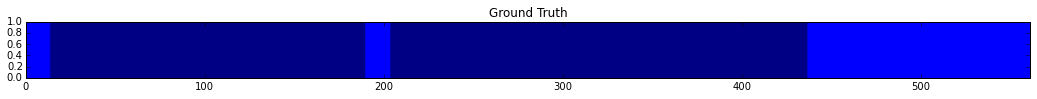

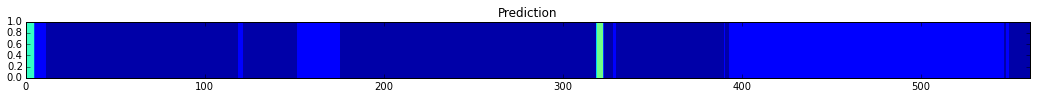

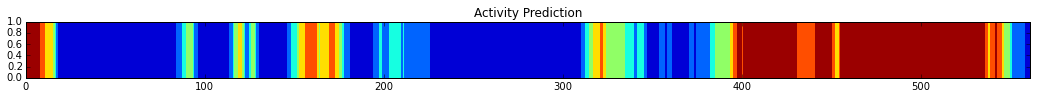



Video ID: HzSCfBOefA4
Main Activity: Washing dishes


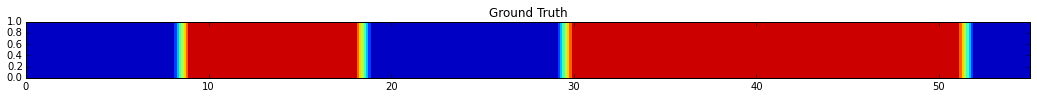

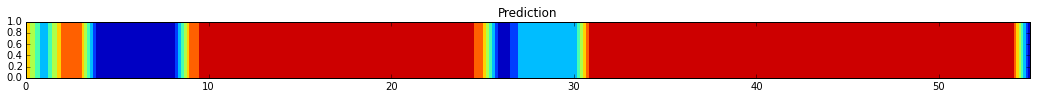

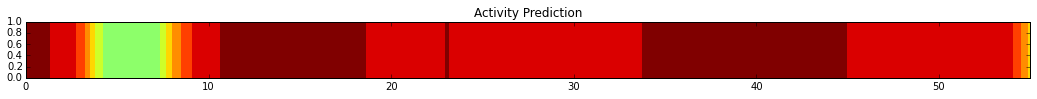



Video ID: 5F4jcV8dHVs
Main Activity: Wakeboarding


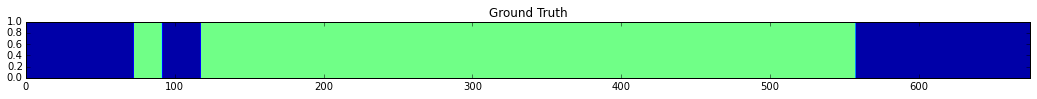

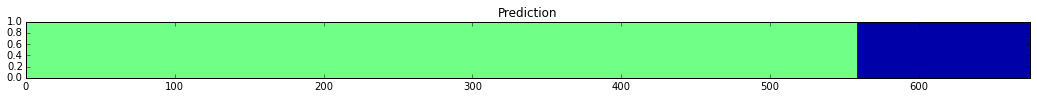

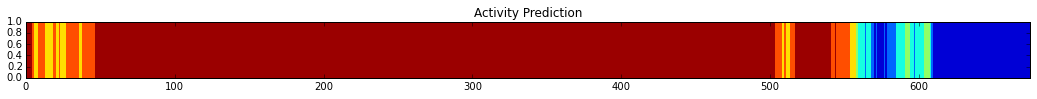



Video ID: J76bFZWXHFY
Main Activity: Rock climbing


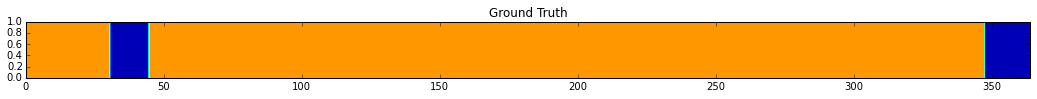

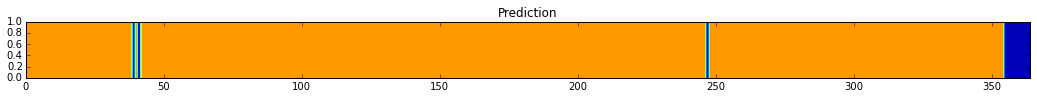

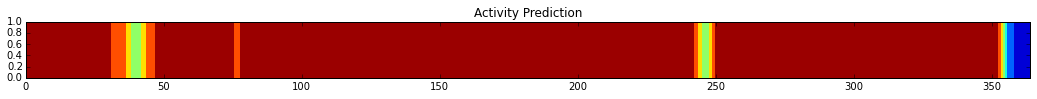



Video ID: hW6aZXhKl9M
Main Activity: Horseback riding


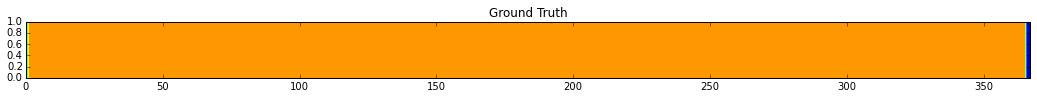

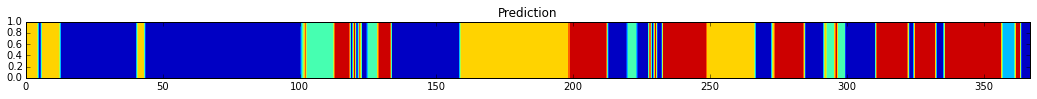

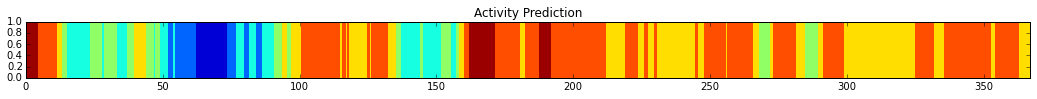

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
normalize = matplotlib.colors.Normalize(vmin=0, vmax=201)
normalize_1 = matplotlib.colors.Normalize(vmin=0, vmax=1)

for v, prediction, class_prediction in predictions:
    v.get_video_instances(16, 0)
    ground_truth = np.array([instance.output for instance in v.instances])
    nb_instances = len(v.instances)
    
    print('Video ID: {}\nMain Activity: {}'.format(v.video_id, v.get_activity()))
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(ground_truth, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Ground Truth')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(class_prediction, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Prediction')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(1-prediction[:,0], (2, nb_instances)), norm=normalize_1, interpolation='nearest')
    plt.title('Activity Prediction')
    plt.show()

    print('\n')

Video ID: HNvolNt5RU0
Main Activity: Playing water polo
0.8118	Swimming
0.1180	Springboard diving
0.0293	Plataform diving


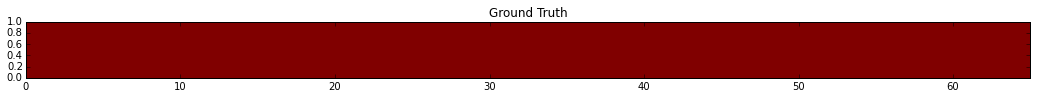

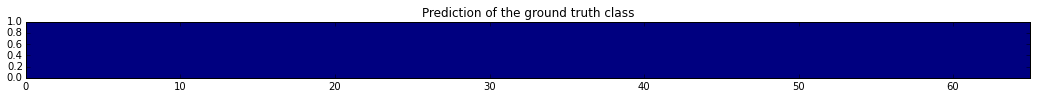

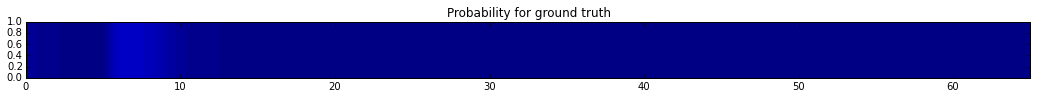



Video ID: fKy5rh-SoTM
Main Activity: Playing pool
0.9520	Playing pool
0.0136	Ping-pong
0.0115	Playing blackjack


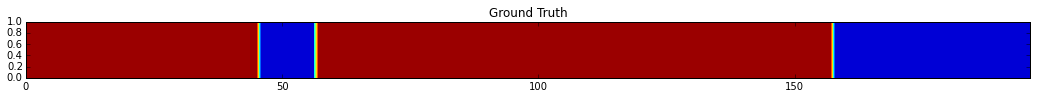

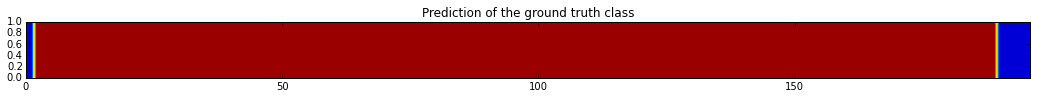

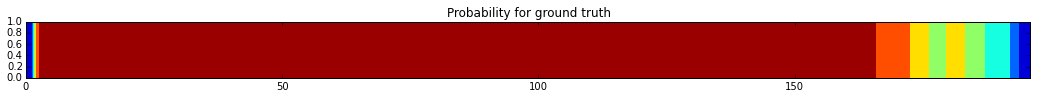



Video ID: sY31L_r7dsk
Main Activity: Preparing salad
0.1887	Preparing salad
0.1139	Making a lemonade
0.0665	Playing drums


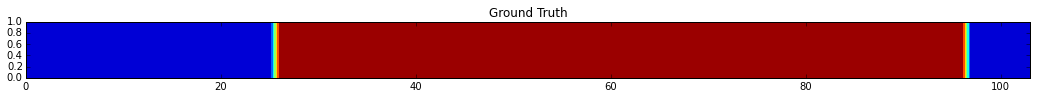

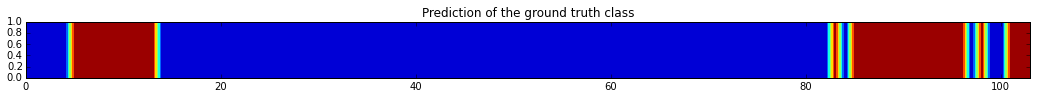

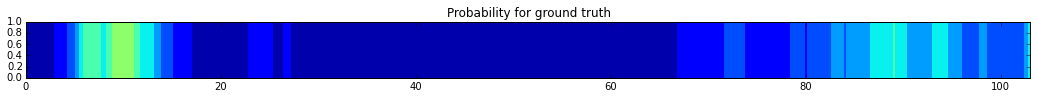



Video ID: Tw1vg9qWLx0
Main Activity: Croquet
0.8571	Croquet
0.0275	Trimming branches or hedges
0.0165	Slacklining


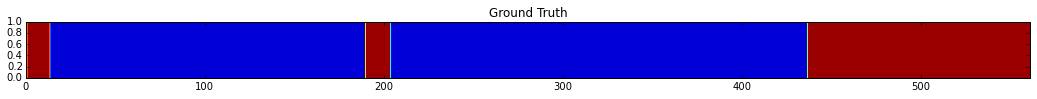

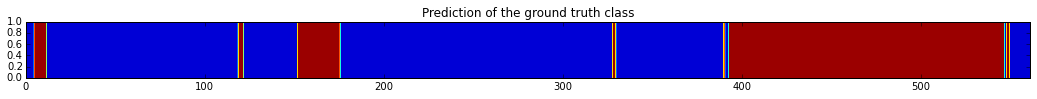

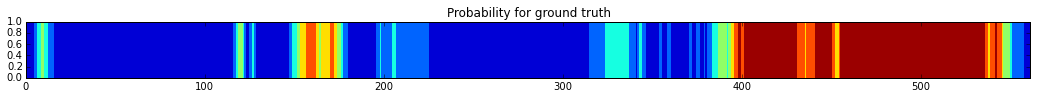



Video ID: HzSCfBOefA4
Main Activity: Washing dishes
0.1890	Washing dishes
0.1000	Making a lemonade
0.0814	Smoking hookah


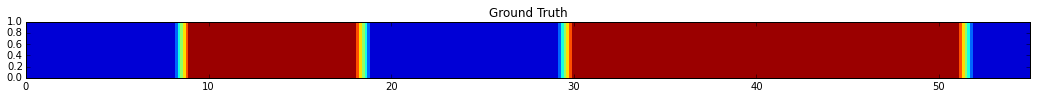

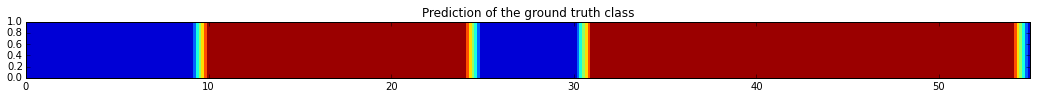

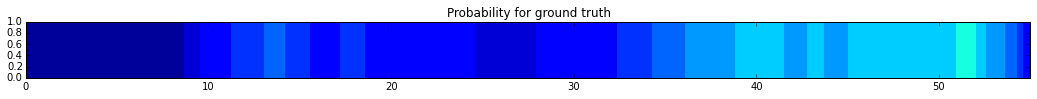



Video ID: 5F4jcV8dHVs
Main Activity: Wakeboarding
0.9441	Wakeboarding
0.0493	Waterskiing
0.0019	Sailing


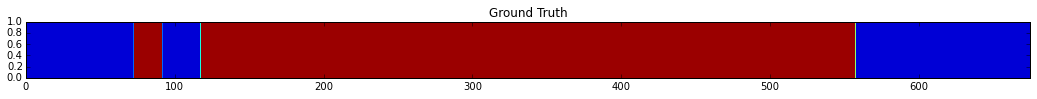

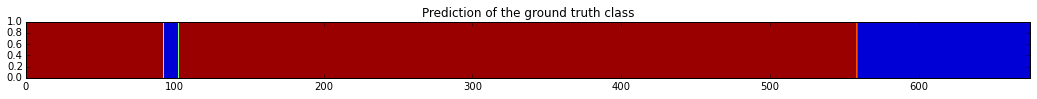

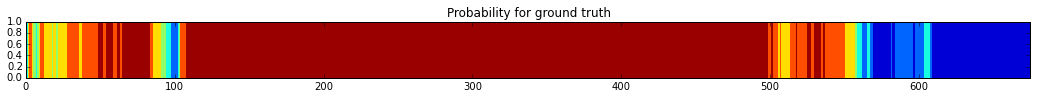



Video ID: J76bFZWXHFY
Main Activity: Rock climbing
0.9677	Rock climbing
0.0065	Trimming branches or hedges
0.0033	Roof shingle removal


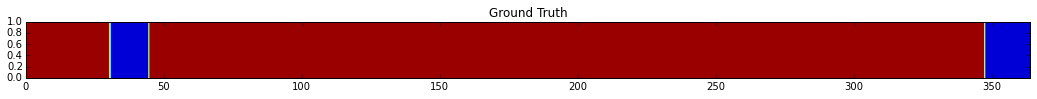

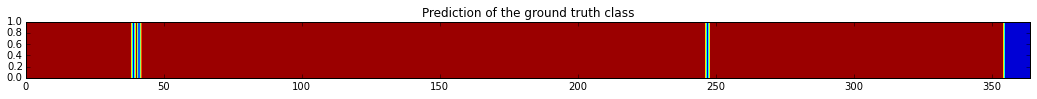

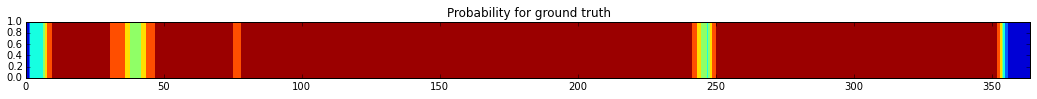



Video ID: hW6aZXhKl9M
Main Activity: Horseback riding
0.2939	Kayaking
0.2811	Horseback riding
0.1069	Scuba diving


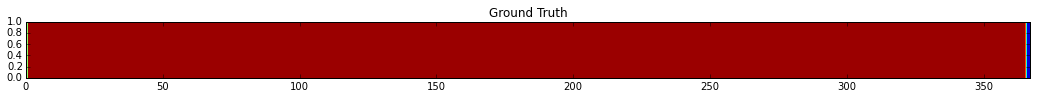

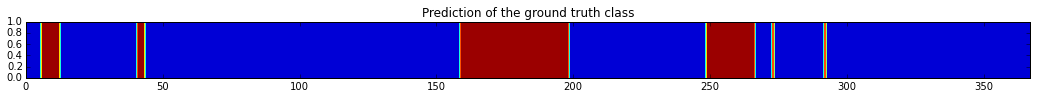

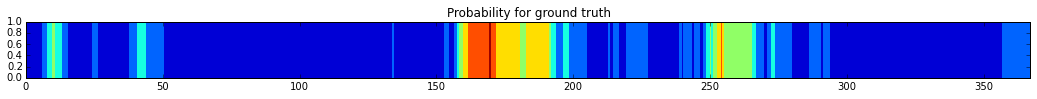

In [5]:
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)

for v, prediction, class_prediction in predictions:
    v.get_video_instances(16, 0)
    ground_truth = np.array([instance.output for instance in v.instances])
    nb_instances = len(v.instances)
    output_index = dataset.get_output_index(v.label)
    
    print('Video ID: {}\nMain Activity: {}'.format(v.video_id, v.get_activity()))

    class_means = np.mean(prediction, axis=0)
    top_3 = np.argsort(class_means[1:])[::-1][:3] + 1
    scores = class_means[top_3]/np.sum(class_means[1:])
    for index, score in zip(top_3, scores):
        if score == 0.:
            continue
        label = dataset.labels[index][1]
        print('{:.4f}\t{}'.format(score, label))
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(ground_truth/output_index, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Ground Truth')
    plt.show()
    
    # print only the positions that predicted the global ground truth category
    temp = np.zeros((nb_instances))
    temp[class_prediction==output_index] = 1
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(temp, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Prediction of the ground truth class')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(prediction[:,output_index], (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Probability for ground truth')
    plt.show()

    print('\n')

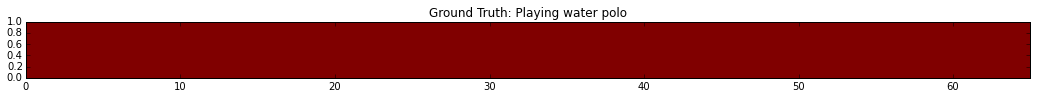

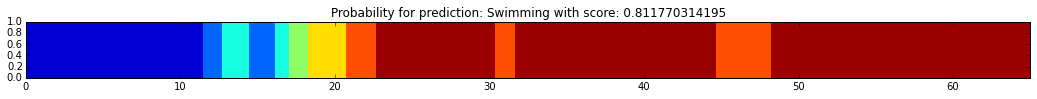

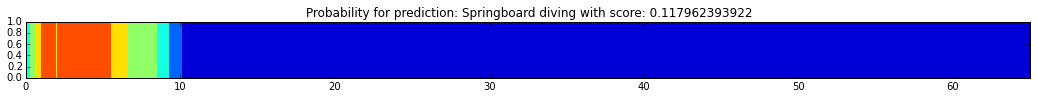

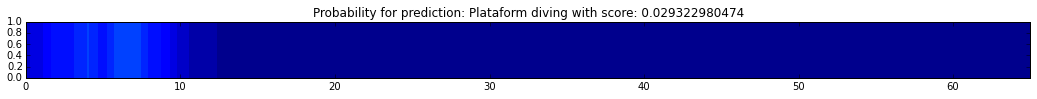

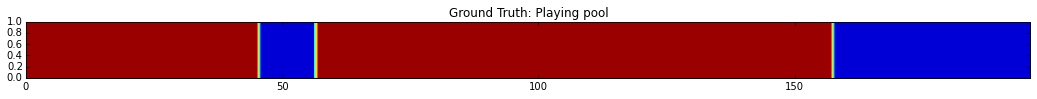

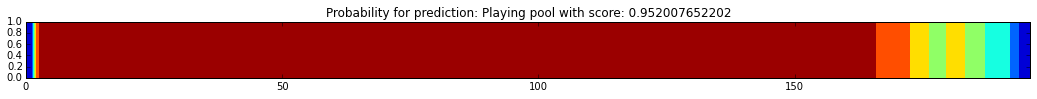

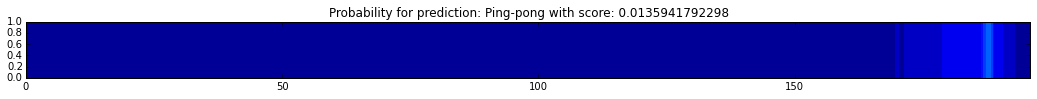

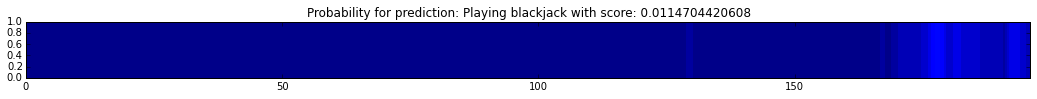

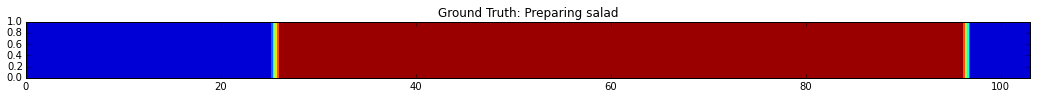

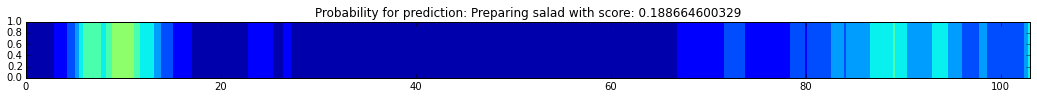

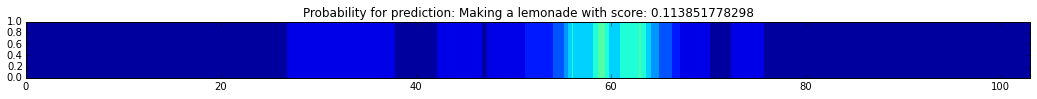

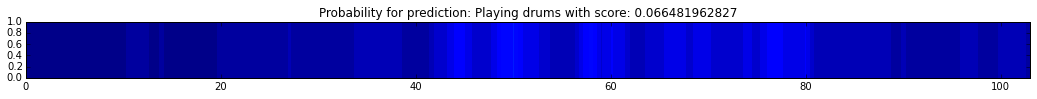

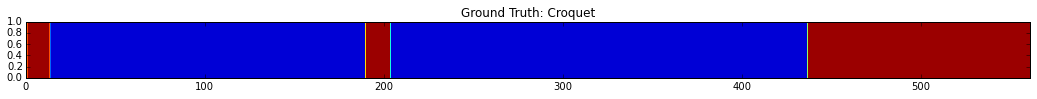

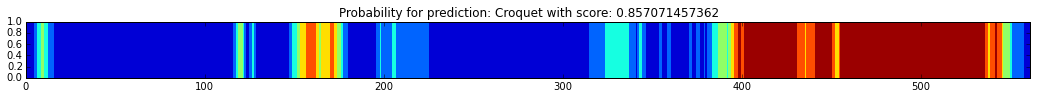

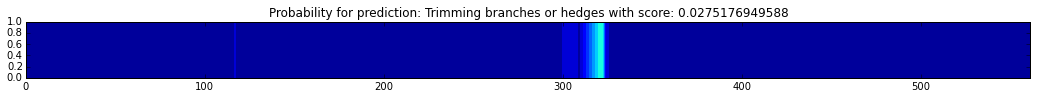

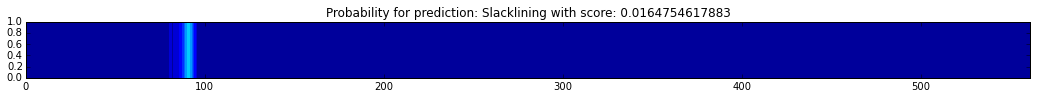

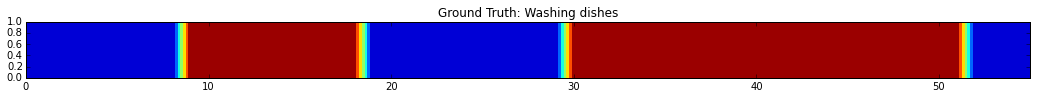

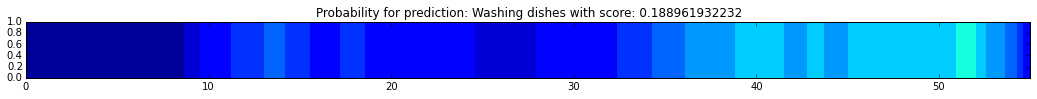

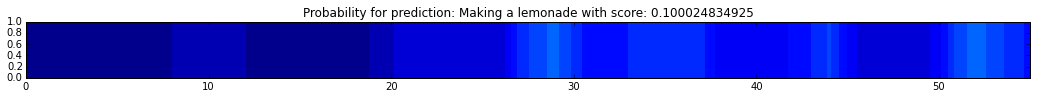

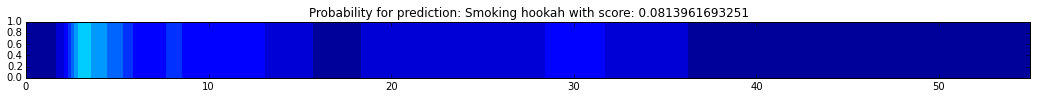

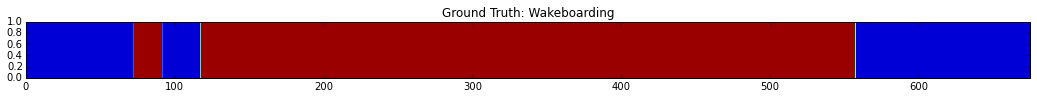

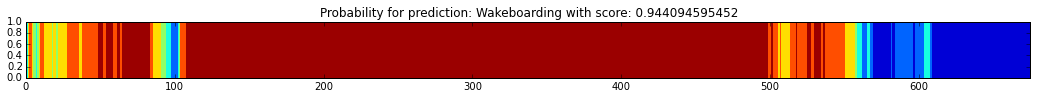

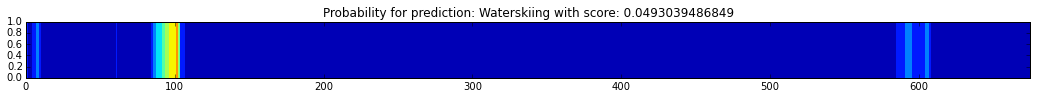

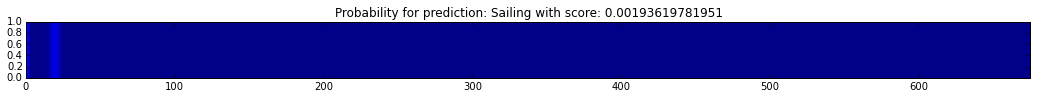

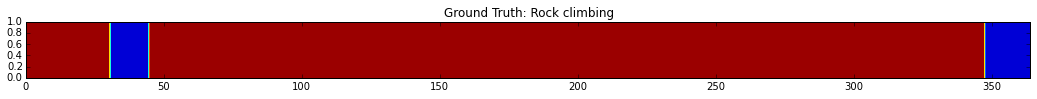

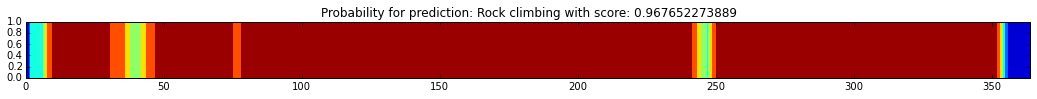

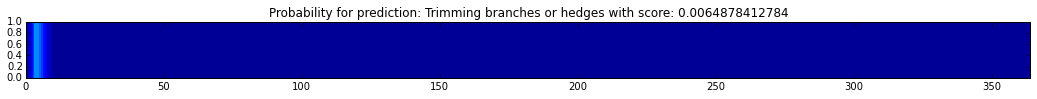

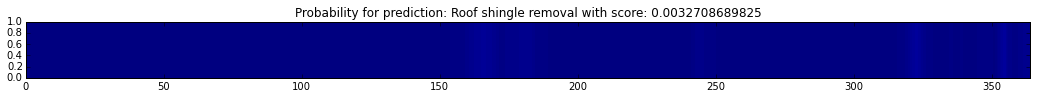

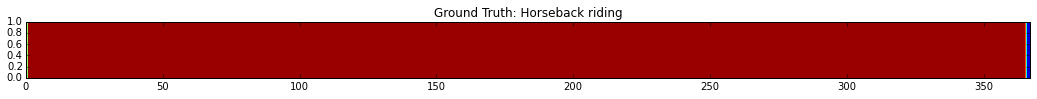

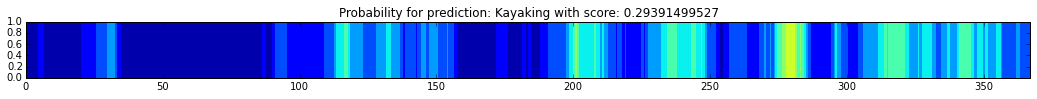

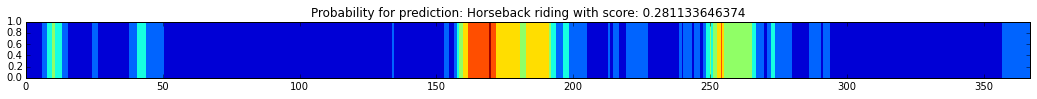

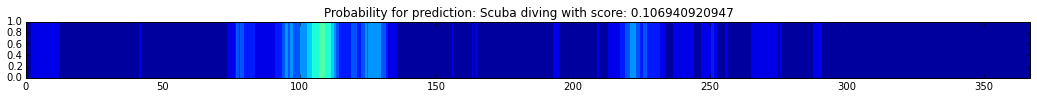

In [6]:
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)

for v, prediction, class_prediction in predictions:
    v.get_video_instances(16, 0)
    ground_truth = np.array([instance.output for instance in v.instances])
    nb_instances = len(v.instances)
    output_index = dataset.get_output_index(v.label)
    
    class_means = np.mean(prediction, axis=0)
    top_3 = np.argsort(class_means[1:])[::-1][:3] + 1
    scores = class_means[top_3]/np.sum(class_means[1:])
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(ground_truth/output_index, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Ground Truth: {}'.format(v.get_activity()))
    plt.show()
    
    for index, score in zip(top_3, scores):
        plt.figure(num=None, figsize=(18, 1), dpi=100)
        plt.contourf(np.broadcast_to(prediction[:,index], (2, nb_instances)), norm=normalize, interpolation='nearest')
        plt.title('Probability for prediction: {} with score: {}'.format(dataset.labels[index][1], score))
        plt.show()
        
    print('\n')

# Temporal Proposals

In [7]:
import json

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [8]:
# Modify this paths
ANNOTATION_FILE = '../../../evaluation/data/activity_net.v1-3.min.json'
PROPOSALS_FILENAME = '../results/results_detection_06_e100_validation.json'
SUBSET = 'validation'

In [9]:
# Read json file containing the annotations
with open(ANNOTATION_FILE, 'r') as fobj:
    data = json.load(fobj)['database']

# Parsing and looking for agnostic segments of an intended subset.
video_id_fmt = '{}'
gt_s_init, gt_s_end, video_id = [], [], []
for vid, vitem in data.iteritems():
    if vitem['subset'] != SUBSET:
        continue
    for ann in vitem['annotations']:
        gt_s_init.append(ann['segment'][0])
        gt_s_end.append(ann['segment'][1])
        video_id.append(video_id_fmt.format(vid))
# Creates ground truth data frame.
ground_truth_df = pd.DataFrame({'s-init': gt_s_init, 
                                's-end': gt_s_end,
                                'video-id': video_id})

In [10]:
# Looking for videos in the subset
intended_videos = []
for vid, vitem in data.iteritems():
    if vitem['subset'] == SUBSET:
        intended_videos.append(vid)

# Reading proposals from HDF5 file.
s_init, s_end, score, video_id = [], [], [], []
with open(PROPOSALS_FILENAME, 'r') as f:
    fobj = json.load(f)['results']
for vid in fobj.keys():
    if vid not in intended_videos:
        continue
    for prediction in fobj[vid]:
        s_init.append(prediction['segment'][0])
        s_end.append(prediction['segment'][1])
        score.append(prediction['label'])
        video_id.append(vid)
    #s_init.extend(fobj[vid]['segment-init'].value.tolist())
    #s_end.extend(fobj[vid]['segment-end'].value.tolist())
    #score.extend(fobj[vid]['score'].value.tolist())
    #video_id.extend(np.repeat(vid, fobj[vid]['segment-init'].value.size).tolist())
proposals_df = pd.DataFrame({'s-init': s_init, 
                             's-end': s_end, 
                             'score': score,
                             'video-id': video_id})
print 'Average number of proposals: {}'.format(proposals_df.shape[0] / float(len(intended_videos)))

Average number of proposals: 0.928136419001


Subrutines to compute temporal IoU and wrapper for recall

In [11]:
def segment_iou(target_segments, test_segments):
    """Compute intersection over union btw segments
    Parameters
    ----------
    target_segments : ndarray
        2-dim array in format [m x 2:=[init, end]]
    test_segments : ndarray
        2-dim array in format [n x 2:=[init, end]]
    Outputs
    -------
    iou : ndarray
        2-dim array [m x n] with IOU ratio.
    Note: It assumes that target-segments are more scarce that test-segments
    """
    if target_segments.ndim != 2 or test_segments.ndim != 2:
        raise ValueError('Dimension of arguments is incorrect')

    m, n = target_segments.shape[0], test_segments.shape[0]
    iou = np.empty((m, n))
    for i in xrange(m):
        tt1 = np.maximum(target_segments[i, 0], test_segments[:, 0])
        tt2 = np.minimum(target_segments[i, 1], test_segments[:, 1])

        # Non-negative overlap score
        intersection = (tt2 - tt1).clip(0)
        union = ((test_segments[:, 1] - test_segments[:, 0]) +
                 (target_segments[i, 1] - target_segments[i, 0]) -
                 intersection)
        # Compute overlap as the ratio of the intersection
        # over union of two segments at the frame level.
        iou[i, :] = intersection / union
    return iou

def recall_vs_iou_thresholds(proposal_df, df, iou_threshold=np.array([0.5])):
    vds = proposal_df['video-id'].unique()
    score_lst = []
    # Compute iou score
    for i, v in enumerate(vds):
        # Proposals
        idx = proposal_df['video-id'] == v
        this_df = proposal_df.loc[idx]
        proposals = np.stack((this_df['s-init'], 
                              this_df['s-end']), axis=-1)

        # Sort proposals
        idx = this_df['score'].argsort()[::-1]
        proposals = proposals[idx, :]

        # Annotations
        jdx = df['video-id'] == v
        ann_df = df.loc[jdx]
        annotations = np.stack((ann_df['s-init'],
                                ann_df['s-end']), axis=-1)
        if proposals.ndim == 1:
            proposals = proposals[np.newaxis, :]
        score_lst.append(segment_iou(annotations, proposals))
        if not (i+1)%500:
            print 'Scored videos: {}'.format(i+1)
    matches = np.zeros((vds.shape[0], iou_threshold.shape[0]))
    pos = np.zeros(vds.shape[0])
    # Matching
    recall = np.empty(iou_threshold.shape[0])
    for cidx, this_iou in enumerate(iou_threshold):
        # Score analysis per video.
        for i, sc in enumerate(score_lst):
            pos[i] = sc.shape[0] # Positives per video.
            lmt = int(sc.shape[1])
            matches[i, cidx] = ((sc[:, :lmt] >= this_iou).sum(axis=1) > 0).sum()
        this_recall = matches[:, cidx].sum() / pos.sum()
        recall[cidx] = this_recall
    return recall

Lets compute the Recall at different Temporal IoU thresholds

In [12]:
iou_thrs = np.arange(0.1, 0.6, 0.1)
recall = recall_vs_iou_thresholds(proposals_df, ground_truth_df, iou_threshold=iou_thrs)

/mnt/imatge-work/amontes/activitynet/venv/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Scored videos: 500
Scored videos: 1000
Scored videos: 1500
Scored videos: 2000
Scored videos: 2500
Scored videos: 3000
Scored videos: 3500
Scored videos: 4000
Scored videos: 4500


Recall vs Temporal IoU curve


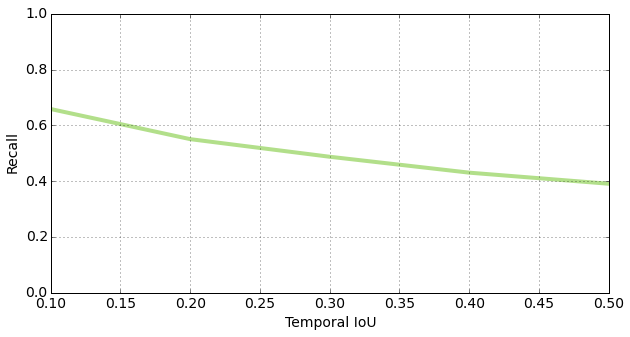

In [13]:
fn_size = 14
plt.figure(num=None, figsize=(10, 5))
plt.plot(iou_thrs, recall, linewidth=4, color=np.array([178,223,138])/255.0)
plt.xlabel('Temporal IoU', fontsize=fn_size)
plt.ylabel('Recall', fontsize=fn_size)
plt.grid(b=True, which="both")
plt.setp(plt.axes().get_xticklabels(), fontsize=fn_size)
plt.setp(plt.axes().get_yticklabels(), fontsize=fn_size)
plt.xlim([0.1, 0.5])
plt.ylim([0, 1])
plt.show()